In [1]:
import yfinance as yf
import pandas as pd

# Stock Data

## Import Data
Historical stock data can be imported using `yfinance`.
- Each stock has a symbol which is unique to it and made up of letters, '.' and '-' up to five characters.
  
**Examples:**
|Company|Symbol|
|:--:|:--:|
|Alphabet|AALP|
|Amazon|AMZN|
|Apple|AAPL|
|Visa|V|
|Allstate|ALL|
|Tesla|TSLA|

- Symbol is used to import the historical data to import the historical data.
- `history()` method returns a dataframe with date as index and 7 columns:
    - Open  : The intial price of the stock in the beginning of the day
    - High  : The highest price of the stock during the day
    - Low   : The lowest price of the stock during the day
    - Close : The final price of the stock at the end of the day
    - Volume: The number of stocks traded during the day
    - Dividens: This is the share of company earnings distributed among its investors 
    - Stock Splits: It is subdividing each share of its stock into a fixed number of units.

- `history()` method by default returns the data for the business days in last month.
    - There are some missing days in the dates. These are the days when market is closed.
    - The index consists of the dates which also include time.
    - *start* and *end* parameters are used to access a data in a particular range.
        - The date should be in the form of 'YEAR-MONTH-DAY' where month is numerical

In [2]:
df = yf.Ticker('AAPL').history()
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,187.149994,188.440002,183.889999,185.639999,82488700,0.0,0.0
2024-01-03 00:00:00-05:00,184.220001,185.880005,183.429993,184.250000,58414500,0.0,0.0
2024-01-04 00:00:00-05:00,182.149994,183.089996,180.880005,181.910004,71983600,0.0,0.0
2024-01-05 00:00:00-05:00,181.990005,182.759995,180.169998,181.179993,62303300,0.0,0.0
2024-01-08 00:00:00-05:00,182.089996,185.600006,181.500000,185.559998,59144500,0.0,0.0


In [3]:
# there is data for 21 days
df.shape

(21, 7)

- *period='max'* returns all available data of a stock

In [4]:
df = yf.Ticker('AAPL').history(period='max')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


- Daily data between '1995-1-1' and '2000-12-31'
    - In the form of 'YEAR-MONTH-DAY' 

In [5]:
df = yf.Ticker('AAPL').history(start='1995-1-1', end='2000-12-31')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-01-03 00:00:00-05:00,0.290907,0.290907,0.283424,0.287166,103868800,0.0,0.0
1995-01-04 00:00:00-05:00,0.289036,0.296520,0.289036,0.294649,158681600,0.0,0.0
1995-01-05 00:00:00-05:00,0.293713,0.294649,0.289972,0.290907,73640000,0.0,0.0
1995-01-06 00:00:00-05:00,0.311486,0.322711,0.307745,0.314292,1076622400,0.0,0.0
1995-01-09 00:00:00-05:00,0.311486,0.313357,0.306809,0.308329,274086400,0.0,0.0


- Remove the last the two columns.

In [6]:
df = yf.Ticker('AAPL').history(start='1995-1-1', end='2000-12-31').iloc[:,:-2]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03 00:00:00-05:00,0.290907,0.290907,0.283424,0.287166,103868800
1995-01-04 00:00:00-05:00,0.289036,0.296520,0.289036,0.294649,158681600
1995-01-05 00:00:00-05:00,0.293713,0.294649,0.289972,0.290907,73640000
1995-01-06 00:00:00-05:00,0.311486,0.322711,0.307745,0.314292,1076622400
1995-01-09 00:00:00-05:00,0.311486,0.313357,0.306808,0.308329,274086400


## Remove Time
In this section we will remove the time part from the index dates.

In [7]:
# reset the index and make the old index the Date column
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,1995-01-03 00:00:00-05:00,0.290907,0.290907,0.283424,0.287166,103868800
1,1995-01-04 00:00:00-05:00,0.289036,0.296520,0.289036,0.294649,158681600
2,1995-01-05 00:00:00-05:00,0.293713,0.294649,0.289972,0.290907,73640000
3,1995-01-06 00:00:00-05:00,0.311486,0.322711,0.307745,0.314292,1076622400
4,1995-01-09 00:00:00-05:00,0.311486,0.313357,0.306808,0.308329,274086400


In [8]:
# Ude dt to access only date part and make it the new values of the 'Date' column
df['Date'] = df.Date.dt.date
df.head()

,Date,Open,High,Low,Close,Volume
0,1995-01-03,0.290907,0.290907,0.283424,0.287166,103868800
1,1995-01-04,0.289036,0.296520,0.289036,0.294649,158681600
2,1995-01-05,0.293713,0.294649,0.289972,0.290907,73640000
3,1995-01-06,0.311486,0.322711,0.307745,0.314292,1076622400
4,1995-01-09,0.311486,0.313357,0.306808,0.308329,274086400


In [9]:
# set the new 'Date' column index again but only with date
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03,0.290907,0.290907,0.283424,0.287166,103868800
1995-01-04,0.289036,0.296520,0.289036,0.294649,158681600
1995-01-05,0.293713,0.294649,0.289972,0.290907,73640000
1995-01-06,0.311486,0.322711,0.307745,0.314292,1076622400
1995-01-09,0.311486,0.313357,0.306808,0.308329,274086400


## Percentage Change
`pct_change()` is used to find the percentage change for each column.
- It returns a dataframe and the first row has null (NaN) values.
- This is because of not having a proviuos day data to compute the percentage change 

In [10]:
# NaN means missing value
df.pct_change().head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-03,NaN,NaN,NaN,NaN,NaN
1995-01-04,-6.430425e-03,0.019294,0.019801,0.026060,0.527712
1995-01-05,1.617990e-02,-0.006309,0.003236,-0.012701,-0.535926
1995-01-06,6.051168e-02,0.095238,0.061292,0.080387,13.620076
1995-01-09,-1.463457e-08,-0.028986,-0.003042,-0.018973,-0.745420


## Remove missing values
`dropna()` can be used to drop the rows with missing values.

In [11]:
# drop missing values
df_pct = df.pct_change().dropna()
df_pct.head()

,Open,High,Low,Close,Volume
Date,,,,,
1995-01-04,-6.430425e-03,0.019294,0.019801,0.026060,0.527712
1995-01-05,1.617990e-02,-0.006309,0.003236,-0.012701,-0.535926
1995-01-06,6.051168e-02,0.095238,0.061292,0.080387,13.620076
1995-01-09,-1.463457e-08,-0.028986,-0.003042,-0.018973,-0.745420
1995-01-10,-9.008490e-03,0.050746,0.006100,0.060296,1.243053


## Multiple Stock Data
Dataframe which consists of Closing values of a list of stocks.
- In the code below, data for each stock in *stock_list* is imported and only its Close column is added to the *df_multiple* datarame which is initially an empty dataframe.

In [12]:
stock_list = ['AMZN', 'TSLA', 'AAPL', 'V']
df_multiple = pd.DataFrame()   # empty dataframe

for stock in stock_list: 
    df_multiple[stock] = yf.Ticker(stock).history(start='2015-1-1', end='2020-12-31').Close   # Close column

df_multiple.head()

,AMZN,TSLA,AAPL,V
Date,,,,
2015-01-02 00:00:00-05:00,15.4260,14.620667,24.466450,62.248863
2015-01-05 00:00:00-05:00,15.1095,14.006000,23.777191,60.874790
2015-01-06 00:00:00-05:00,14.7645,14.085333,23.779427,60.482529
2015-01-07 00:00:00-05:00,14.9210,14.063333,24.112871,61.292866
2015-01-08 00:00:00-05:00,15.0230,14.041333,25.039339,62.114994


- As a second way we can first initiate the dataframe with the Close column of the first stock then we can add the Close values for other stocks to the dataframe.

In [13]:
close_first = yf.Ticker(stock_list[0]).history(start='2015-1-1', end='2020-12-31')['Close']
close_first.rename(stock_list[0], inplace=True)    # rename: Close ---> 'MMM"
df_multiple = pd.DataFrame(close_first)            # convert series to a dataframe with single column
df_multiple.head()

,AMZN
Date,
2015-01-02 00:00:00-05:00,15.4260
2015-01-05 00:00:00-05:00,15.1095
2015-01-06 00:00:00-05:00,14.7645
2015-01-07 00:00:00-05:00,14.9210
2015-01-08 00:00:00-05:00,15.0230


In [14]:
for stock in stock_list[1:]:
    close = yf.Ticker(stock).history(start='2015-1-1', end='2020-12-31')['Close']
    close.rename(stock, inplace=True)
    close = pd.DataFrame(close)

    df_multiple = pd.concat([df_multiple, close], axis=1)

df_multiple.head() 

,AMZN,TSLA,AAPL,V
Date,,,,
2015-01-02 00:00:00-05:00,15.4260,14.620667,24.466454,62.248844
2015-01-05 00:00:00-05:00,15.1095,14.006000,23.777193,60.874790
2015-01-06 00:00:00-05:00,14.7645,14.085333,23.779428,60.482525
2015-01-07 00:00:00-05:00,14.9210,14.063333,24.112871,61.292885
2015-01-08 00:00:00-05:00,15.0230,14.041333,25.039335,62.114971


In [15]:
# remove time
df_multiple.reset_index(inplace=True)
df_multiple['Date'] = df_multiple.Date.dt.date
df_multiple.set_index('Date', inplace=True)
df_multiple.head()

,AMZN,TSLA,AAPL,V
Date,,,,
2015-01-02,15.4260,14.620667,24.466454,62.248844
2015-01-05,15.1095,14.006000,23.777193,60.874790
2015-01-06,14.7645,14.085333,23.779428,60.482525
2015-01-07,14.9210,14.063333,24.112871,61.292885
2015-01-08,15.0230,14.041333,25.039335,62.114971


## Correlation Coefficient
Pearson correlation coefficient of a two data sets is a number between $-1$ and $1$ which represents the strength of the linear relationship between two data.

- If this number is close to $+1$:
    - The points in the scatter plot of two datasets is close to a line which has a positive slope.
- If this number is close to $-1$:
    - The points in the scatter plot of two datasets is close to a line which has a negative slope.
- If this number is close to $0$:
    - The points in the scatter plot of two datasets is not close to a line.
  


- Correlation coefficients can be computed for each pair of columns as follows:. 

In [16]:
from scipy.stats import pearsonr
pearsonr(df_multiple['AMZN'],df_multiple['TSLA'])[0]

0.7539676106876784

The `corr()` method returns a dataframe which consists of (Pearson) correlation coefficients of each pair of columns.
- The diagonal values are all 1 becausse it represents the correlation of two same data.
- It is symmetric because correlation coefficients of stock1-stock2 pair and stock2-stock1 pair are  equal.

In [17]:
df_multiple.corr()

,AMZN,TSLA,AAPL,V
AMZN,1.000000,0.753968,0.936848,0.947092
TSLA,0.753968,1.000000,0.884444,0.614037
AAPL,0.936848,0.884444,1.000000,0.882409
V,0.947092,0.614037,0.882409,1.000000


- Seaborn library's heatmap is very useful to visualize correlation matrix.
- *annot=True* is to display the numbers.

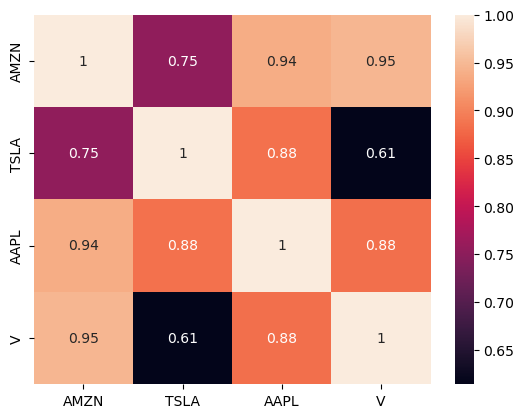

In [18]:
import seaborn as sns
sns.heatmap(df_multiple.corr(), annot=True);

# Projects

## Project-1: SP500 Correlations

### Step-1: Symbol List
Import the stock symbols from the wikipedia website: `'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'`,
store them in a list and modify them

- Import the first table of the website using `read_html()`

In [19]:
df_sp = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
df_sp.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


- Store the *Symbols* column values in a list.
    - Use `to_list` to convert a series to a list. 

In [20]:
symbol_list = df_sp['Symbol'].to_list()
symbol_list[:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']

- Remove 'GOOG' and 'FOXA' from the symbol list.
    - Alphabet (Google) and Fox have two stocks which behave similarly so we will remove one symbol for each  company.

-  Print the symbols start with 'GO'

In [21]:
for stock in symbol_list:
    if stock.startswith('GO'):
        print(stock)

GOOGL
GOOG


- Print the symbols start with'FO'

In [22]:
for stock in symbol_list:
    if stock.startswith('FO'):
        print(stock)

FOXA
FOX


In [23]:
# check the length of the list before and after removing two stocks
print(len(symbol_list))
symbol_list.remove('GOOG')
symbol_list.remove('FOXA')
print(len(symbol_list))

503
501


- Replace '.' by  `-` since yfinance uses dashes instead of periods.
    - Find the symbols which contains '.' (dot).
    - If there is a '.' (dot) in the symbol replace it with '-' (dash).

In [24]:
for symbol in symbol_list:
    if '.' in symbol:
        print(symbol)

BRK.B
BF.B


In [25]:
for symbol in symbol_list:
    if '.' in symbol:
        ind = symbol_list.index(symbol)
        symbol_list[ind] = symbol.replace('.','-')

In [26]:
# no output
for symbol in symbol_list:
    if '.' in symbol:
        print(symbol)

### Step-2: Close Data
Construct a dataframe which has the Close values between *2021-1-1*  and *2023-12-31* of each stock in stock_list. 

In [27]:
# the first 5 symbols
symbol_list[:5]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']

- Start the construction of the dataframe with the *Close* column of the symbol of index 0: 'MMM' 

In [28]:
close_first = yf.Ticker(symbol_list[0]).history(start='2021-1-1', end='2023-12-31')['Close']
close_first.rename(symbol_list[0], inplace=True)   # rename: Close ---> 'MMM"
df_sp = pd.DataFrame(close_first)                  # convert series to a dataframe with single column
df_sp.head()

,MMM
Date,
2021-01-04 00:00:00-05:00,150.696121
2021-01-05 00:00:00-05:00,150.441849
2021-01-06 00:00:00-05:00,152.730270
2021-01-07 00:00:00-05:00,148.810989
2021-01-08 00:00:00-05:00,146.092926


In [29]:
# the number of missing values
df_sp.isnull().sum().sum()

0

- The following code is the main part of this step.
- It adds a column for each symbol if it has no missing value.
     - These symbols will be printed.

``` python
for symbol in symbol_list[1:]:
    close = yf.Ticker(symbol).history(start='2021-1-1', end='2023-12-31')['Close']
    close.rename(symbol, inplace=True)
    close = pd.DataFrame(close)

    if len(close) != len(df_sp):   # check whether for symbol there are enough values
        print(symbol)
    else:
        df_sp = pd.concat([df_sp, close], axis=1)
```

- Output  
CEG  
GEHC  
KVUE  
VLTO  

- Since it is time consuming to execute the above code it is better to save it as a csv file for further use.
```python
df_sp.to_csv('data_files/sp_data.csv')
```

In [30]:
# index_col: which column is index
# parse_dates: import index as a date
df_sp = pd.read_csv('data_files/sp_data.csv', index_col=0, parse_dates=True)
df_sp.head()

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,150.696106,50.896690,103.105202,92.173615,245.115585,485.339996,92.300003,21.361832,40.139668,116.384743,...,195.267776,378.961700,106.067345,60.077137,96.228065,100.226860,378.130005,145.390503,38.797554,159.686401
2021-01-05 00:00:00-05:00,150.441864,51.227070,104.380890,93.126740,246.511032,485.690002,92.769997,22.078794,40.204712,117.336311,...,193.638168,380.058990,109.331718,59.491558,96.112228,100.236328,380.570007,147.906082,39.412094,160.799255
2021-01-06 00:00:00-05:00,152.730316,52.992210,104.163544,92.322266,249.206253,466.309998,90.330002,22.961210,41.756775,120.553963,...,195.267776,382.282410,109.986580,60.809116,100.166382,100.785675,394.820007,152.120865,43.840424,163.161453
2021-01-07 00:00:00-05:00,148.811020,53.643543,105.174660,93.310387,251.557510,477.739990,95.160004,22.731415,41.524433,123.761826,...,196.753616,385.015930,108.895149,59.619656,104.712822,100.018486,409.100006,151.219055,45.177963,163.015091
2021-01-08 00:00:00-05:00,146.092896,53.011101,105.467613,93.800056,252.474991,485.100006,94.580002,23.365654,41.347851,124.644699,...,195.210281,381.810669,108.180756,60.168636,103.651016,101.486549,405.470001,150.886826,44.030209,164.098572


In [31]:
# shape of the dataframe
df_sp.shape

(753, 497)

### Step-3: Correlations
In this step, for each pair of symbols correlation coefficients will be computed and the 6 pairs with heighest and lowest correlation coefficients will be determined.

- Store the correlations of each pair in a dataframe.
- Display the 6 pairs with highest and lowest correlations.

``` python
df_corr = pd.DataFrame(columns=['Stock-1', 'Stock-2', 'Correlation'])

for i in range(len(df_sp.columns)):
    for j in range(i+1, len(df_sp.columns)):
        stock1 = df_sp.columns[i]
        stock2 = df_sp.columns[j]
        corr = pearsonr(df_sp[stock1], df_sp[stock2])[0]
        df_corr.loc[len(df_corr)] = stock1, stock2, corr
```

- It is time consuming to execute the code above, therefore it is better to save it as a csv file.

``` python
df_corr.to_csv('correlation.csv')
```

In [32]:
df_corr = pd.read_csv('data_files/correlation.csv', index_col=0)
df_corr.head()

,Stock-1,Stock-2,Correlation
0,MMM,AOS,0.063387
1,MMM,ABT,0.715564
2,MMM,ABBV,-0.822724
3,MMM,ACN,0.124522
4,MMM,ADBE,0.470797


In [33]:
df_corr.sort_values('Correlation').head(6)

,Stock-1,Stock-2,Correlation
104888,MCK,VFC,-0.964388
75329,XOM,VFC,-0.962925
75165,XOM,MTCH,-0.961040
104148,MTCH,MCK,-0.955417
102923,MPC,VFC,-0.952390
104897,MCK,DIS,-0.950410


In [34]:
df_corr.sort_values('Correlation', ascending=False).head(6)

,Stock-1,Stock-2,Correlation
53551,COP,EOG,0.989266
64731,DHI,LEN,0.987987
36863,CDNS,SNPS,0.984475
70077,EOG,MRO,0.984452
17941,APA,MRO,0.983864
37582,CPT,MAA,0.982877


### Step-4: Visualization
In the step we will visualize the pairs with high and low correlations to see the strong positive or negative correlations between them.

- Display the lineplots of the six pairs with highest and lowest correlations.
    - Use subplots

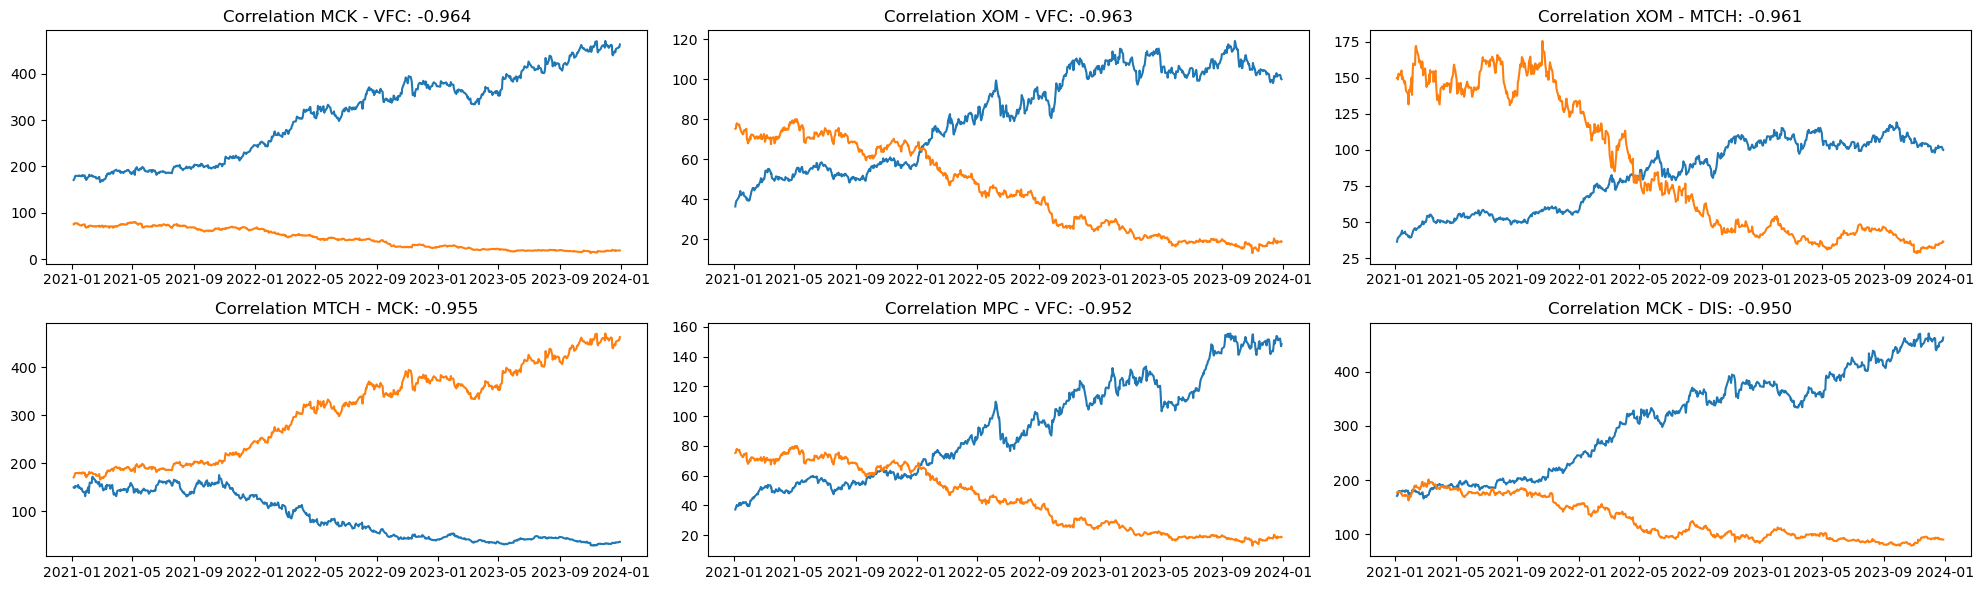

In [35]:
# Lowest 6 pairs
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
for i in range(1,7):
    plt.subplot(2,3,i)
    stock1, stock2, corr = df_corr.sort_values('Correlation').iloc[i-1].values
    plt.title(f'Correlation {stock1} - {stock2}: {corr:.03f}')
    plt.plot(df_sp[stock1])
    plt.plot(df_sp[stock2])
plt.tight_layout()

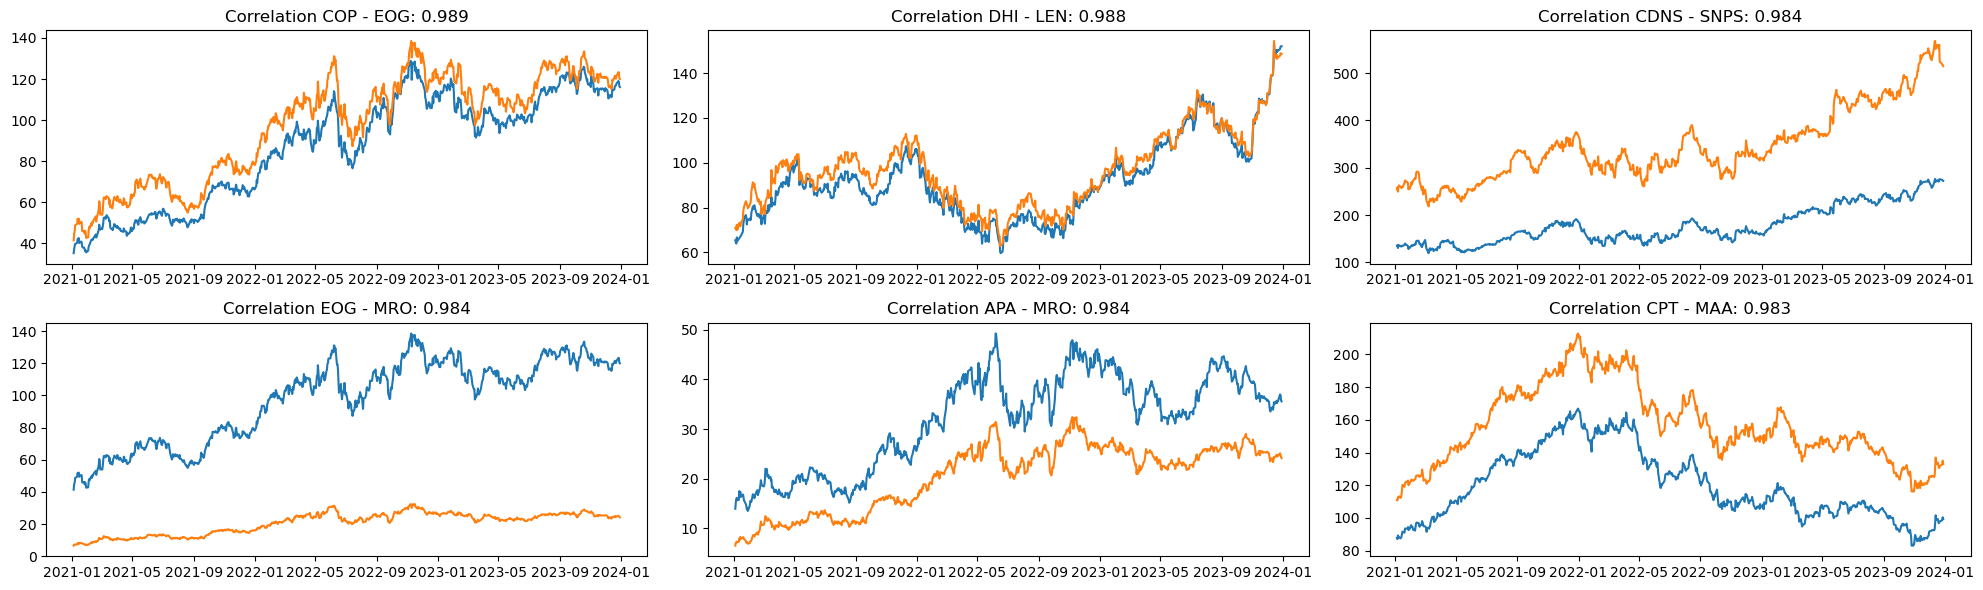

In [36]:
# Highest 6 pairs

plt.figure(figsize=(20,6))
for i in range(1,7):
    plt.subplot(2,3,i)
    stock1, stock2, corr = df_corr.sort_values('Correlation', ascending=False).iloc[i-1].values
    plt.title(f'Correlation {stock1} - {stock2}: {corr:.03f}')
    plt.plot(df_sp[stock1])
    plt.plot(df_sp[stock2])
plt.tight_layout()

- Display the scatterplots of the six pairs with highest and lowest correlations.
    - Use subplots

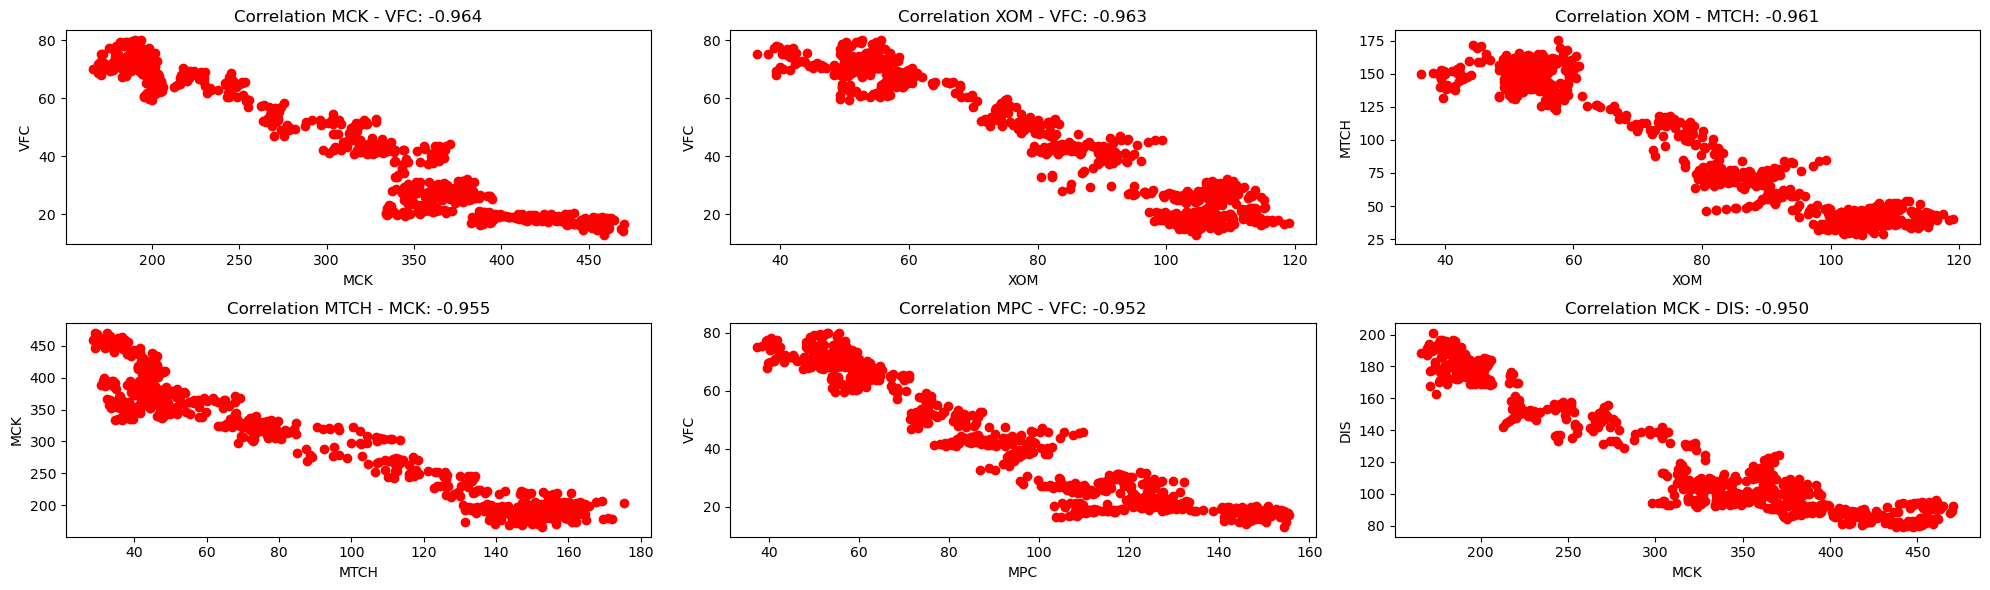

In [37]:
# Lowest 6 pairs
plt.figure(figsize=(20,6))
for i in range(1,7):
    plt.subplot(2,3,i)
    stock1, stock2, corr = df_corr.sort_values('Correlation').iloc[i-1].values
    plt.title(f'Correlation {stock1} - {stock2}: {corr:.03f}')
    plt.scatter(df_sp[stock1], df_sp[stock2], c='r')
    plt.xlabel(stock1)
    plt.ylabel(stock2)
plt.tight_layout()

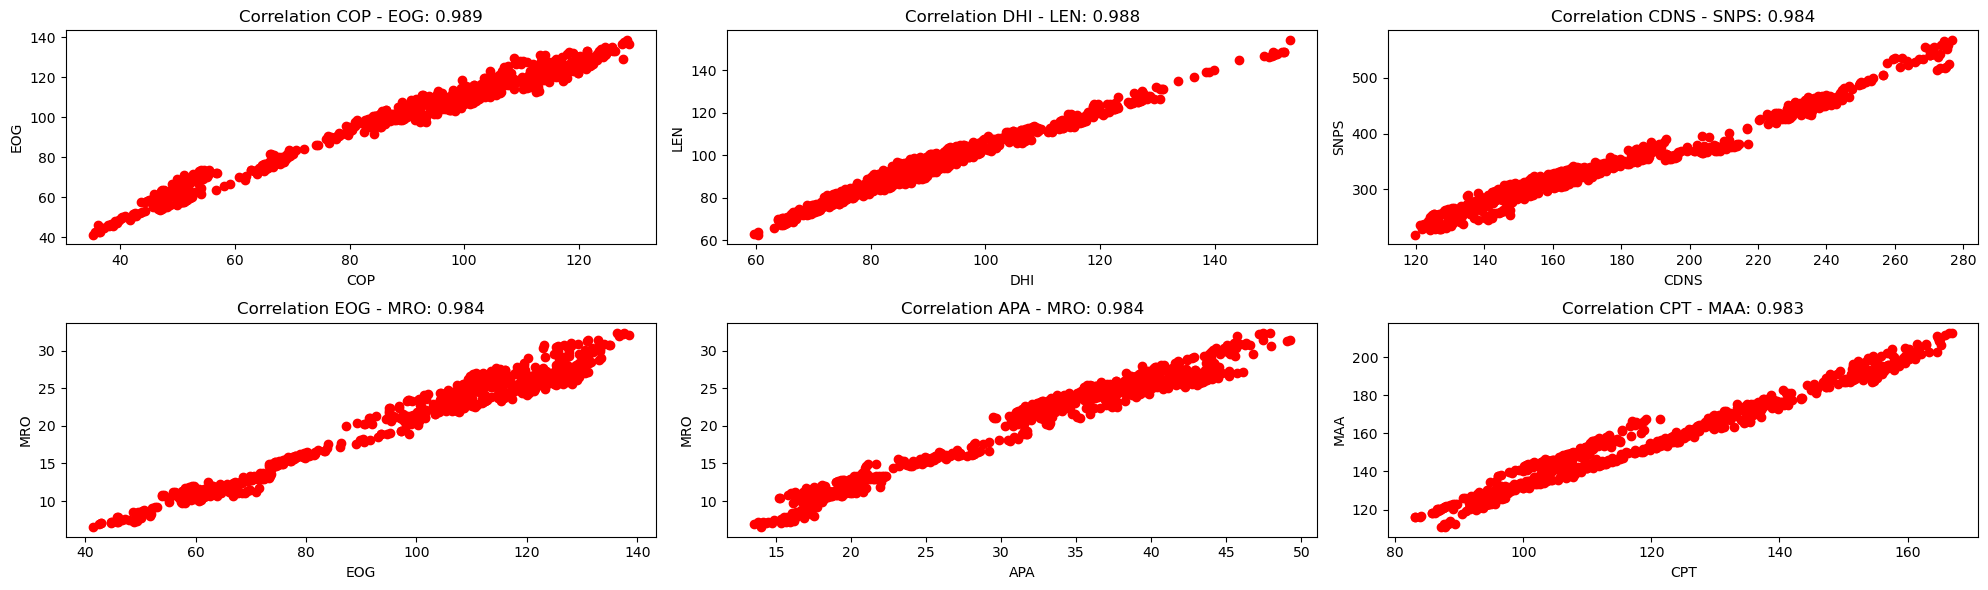

In [38]:
# Highest 6 pairs
plt.figure(figsize=(20,6))
for i in range(1,7):
    plt.subplot(2,3,i)
    stock1, stock2, corr = df_corr.sort_values('Correlation', ascending=False).iloc[i-1].values
    plt.title(f'Correlation {stock1} - {stock2}: {corr:.03f}')
    plt.scatter(df_sp[stock1], df_sp[stock2], c='r')
    plt.xlabel(stock1)
    plt.ylabel(stock2)
plt.tight_layout()